# TELCO CHURN


## Goal:

    -Discover the drivers of churn in the telco data set
    -use these drivers to make a model that predicts whether or not a customer will churn.

## Imports:    

In [1]:
from prepare import prep_telco_data
import acquire 
import env 
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import scipy.stats as stats
from scipy.stats import  chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Acquire
    -Data acquired from Telco Data Set
    -It contained 7043 rows and 21 columns before cleaning
    -Each row represents a customer ID
    -Each column represents a feature of that customer

##  Prepare

### Prepare Actions:
```
Removed columns that did not contain useful information
Renamed columns to promote readability
Checked for nulls in the data 
Checked that column data types were appropriate
Removed white space from values in object columns
Added Target column 'has_churned' indicating whether the has churned or not
Encoded categorical variables
Split data into train, validate and test (approx. 50/30/20), stratifying on 'churn'
Outliers have not been removed for this iteration of the project
```

## Data Dictionary

| Attribute | Definition | Data Type |
| ----- | ----- | ----- |
| total_charges | total accumulated charges| float |
| monthly_charges|customers charges monthly | float |
| tenure |months a customer has been with company |int |
| gender_female |customer is or is not female | int |
| gender |sex of customer |  object
| senior_citizen   |customer stats of senior or not senior | int64
| partner  | has partner or does not |  int64
| dependents  |does customer have dependents |  int64
|     phone_service |customer purchsed phone service |    int64
|    multiple_lines |customer has multiple lines |   object
|   online_security |customer signed up for online security |   object
|     online_backup |customer opt in to online backup|   object
| device_protection |customer is enrolled in device protection |   object
|      tech_support |customer opt in for tech support |   object
|      streaming_tv |customer signed up for streaming television |   object
|  streaming_movies |customer signed up for streaming movies |   object
| paperless_billing |enrolled in e-bill |    int64
|           churn   |customer is active or is not active | object
|    contract_type  |service contract customer selected |  object
|internet_service_type |info for what kind of internet service customer chose  |  object
| payment_type | info for customer preffered payment method |  object
| has_churned  | whether a customer has churned |  int64
|multiple_lines_No phone service  |multiple phone lines  | uint8
|                   multiple_lines_Yes  | multiple lines  | uint8
|  online_security_No internet service  | customer doesnt have online security  | uint8
|                  online_security_Yes  | customer has online security  | uint8
|    online_backup_No internet service  | customer does not have online back up  | uint8
|                    online_backup_Yes  | customer has online back up  | uint8
|device_protection_No internet service  | customer does not have device protection  | uint8
|                device_protection_Yes  |  customer does have device protection | uint8
|     tech_support_No internet service  | customer does not have tech support  | uint8
|                     tech_support_Yes  | customer has tech support  | uint8
|     streaming_tv_No internet service  | customer does not have tv streaming  | uint8
|                     streaming_tv_Yes  | customer can stream tv  | uint8
| streaming_movies_No internet service  |  customer cannot stream movies | uint8
|                 streaming_movies_Yes  |customer is able to stream movies   | uint8
|               contract_type_One year  | customer is on a one year contract  | uint8
|               contract_type_Two year  | customer is on a two year contract  | uint8
|    internet_service_type_Fiber optic  | customer has fiber internet  | uint8
|           internet_service_type_None  |  customer does not have internet | uint8
| payment_type_Credit card (automatic)  |  customer pays via credit card | uint8
|        payment_type_Electronic check  | customer pays via e-check  | uint8
|            payment_type_Mailed check  | customer pays with mail-in check  | uint8
**


# Quick Data Preview

In [2]:
#code to acquire the telco data using function from acquire.py file
df = acquire.new_telco_data()

In [3]:
#code to prep the telco data using function from prepare.py file
#%%capture
train, validate, test = prep_telco_data(df)

In [4]:
#code to preview the train dataset
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,8331-ZXFOE,Female,0,0,0,58,1,Yes,Yes,Yes,...,0,0,0,1,0,0,0,1,0,0
1915,2790-XUYMV,Male,0,0,1,71,1,Yes,Yes,Yes,...,0,0,0,1,0,1,0,1,0,0
5054,7107-UBYKY,Female,0,1,1,35,1,Yes,No internet service,No internet service,...,0,1,0,0,0,0,1,0,1,0
2355,3373-YZZYM,Male,0,1,1,1,1,No,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
6279,8883-GRDWQ,Male,1,0,0,20,1,No,Yes,No,...,0,0,0,1,0,0,0,0,0,1


## Data Summary

In [5]:
#this describes columns in train set
train.describe()

,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,churn,has_churned,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,...,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.161290,0.485141,0.302769,32.775210,0.905258,0.590297,64.805131,2316.775641,0.265685,0.265685,...,0.386335,0.220218,0.391415,0.207010,0.243078,0.437389,0.220218,0.227330,0.327407,0.226314
std,0.367845,0.499843,0.459514,24.709604,0.292896,0.491841,30.294804,2284.984394,0.441753,0.441753,...,0.486971,0.414447,0.488129,0.405215,0.428997,0.496127,0.414447,0.419161,0.469327,0.418498
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.850000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,34.700000,396.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,30.000000,1.000000,1.000000,70.250000,1414.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,90.300000,3893.600000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.650000,8594.400000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Explore

## No Churn VS Churn

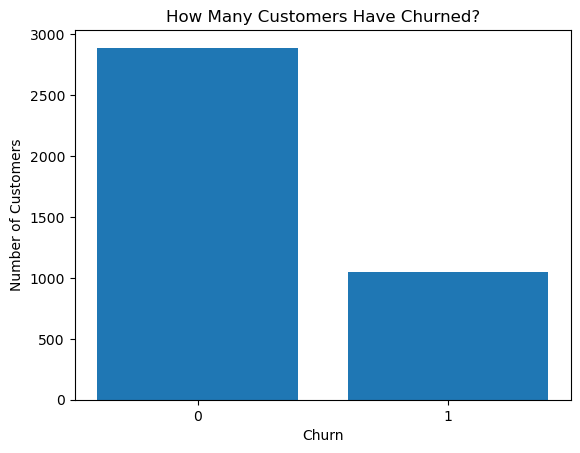

In [6]:
#this creates a bar plot in order to visualize total customers churned and not churned
train_churn_value_counts = train.churn.value_counts()
plt.bar(train_churn_value_counts.index, train_churn_value_counts.values)
plt.title("How Many Customers Have Churned?")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks([0, 1])
plt.show()

 -Approximately 26% of total customers have churned

## Does gender effect Churn?

<Axes: xlabel='has_churned', ylabel='gender_female'>

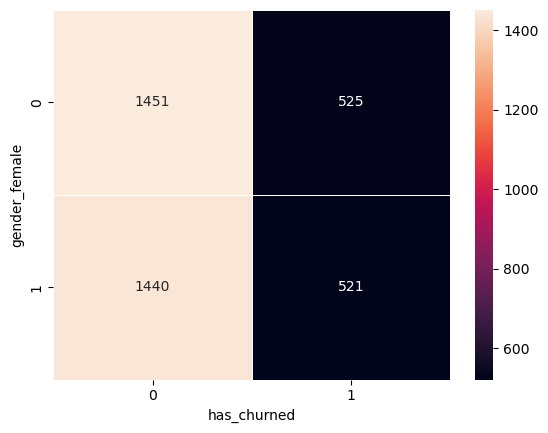

In [7]:
#this create a visual of number of females and males churned
contingency_table = pd.crosstab(train['gender_female'], train['has_churned'])
contingency_table

sns.heatmap(contingency_table, annot = True, fmt ='d', linewidths = .5)

- Number of females churned/not churn is fairly equal to number of male churned/not churned.
#### I will now use a chi2 test to investigate whether gender is associated with churn.

- I will use a confidence interval of 95%
- The resulting alpha is .05
#### Ho: Gender is independent on churn
#### Ha: Gender is dependent on churn.

In [8]:
# alpha set to 0.05 
a = 0.05
contingency_table = pd.crosstab(train['gender_female'], train['has_churned'])
# chi2 test is ran
chi2, p_val, dof, expected = chi2_contingency(contingency_table)
p_val

1.0

In [9]:
#code gives a true or false response to the mathematic equation below
p_val < a

False

#### The p-value is greater than the alpha. Therefore, we have confidence that gender and churn are not asscoiated. Based on this, we fail to reject the null hypothesis.

## Does total charges effect churn?

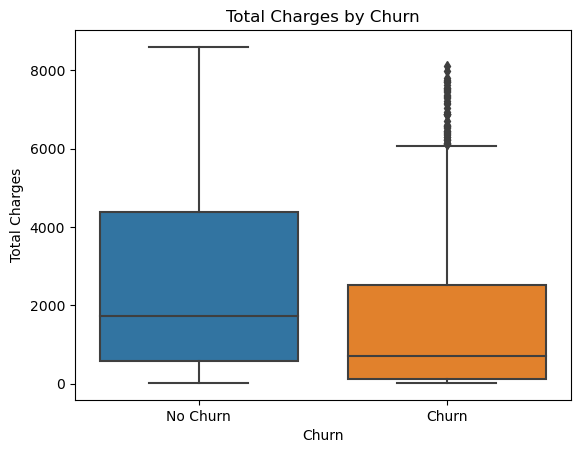

In [10]:
# creating box plot for churn and total charges
sns.boxplot(x='churn', y='total_charges', data=train)
plt.title("Total Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()


- There seems to be an association between tenure and churn based off the means above

#### I will now use a independent t test to investigate whether total charges and churn are associated.

- I will use a confidence interval of 95%
- The resulting alpha is .05
#### Ho: Total charges and churn are not associated.
#### Ha: Total charges and churn are associated.

In [11]:
# sets alpha value and runs independent ttest for total charges
a = 0.05
churned = train[train['has_churned'] == 1]['total_charges']
not_churned = train[train['has_churned'] == 0]['total_charges']

t_statistic, p_val = stats.ttest_ind(churned, not_churned)
p_val

1.2955473562990627e-34

In [12]:
#code gives a true or false response to the mathematic equation below
p_val < a

True

#### The p-value is less than the alpha. Therefore, we have confidence to support that total charges and churn are asscoiated. Based on this, we can successfully reject the null hypothesis.

## Does monthly charges have and effect on churn?

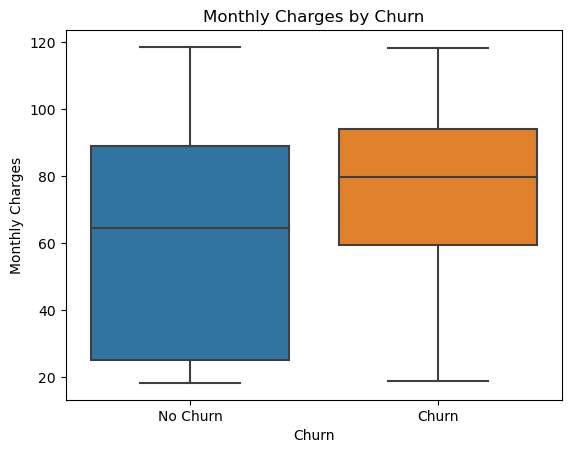

In [13]:
# creating box plot for churn and monthly charges
sns.boxplot(x='churn', y='monthly_charges', data=train)
plt.title("Monthly Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

- Churn occurs more during higher monthly charges compared to when there is no churn
#### I will now use a independent t test to investigate whether monthly charges and churn are associated.

- I will use a confidence interval of 95%
- The resulting alpha is .05
#### Ho: Monthly charges and churn are not associated.
#### Ha: Monthly charges and churn are associated.

In [14]:
# sets alpha value and runs independent ttest for monthly charges
a = 0.05
churned = train[train['has_churned'] == 1]['monthly_charges']
not_churned = train[train['has_churned'] == 0]['monthly_charges']

t_statistic, p_val = stats.ttest_ind(churned, not_churned)
p_val

1.0736272928972876e-35

In [15]:
#code gives a true or false response to the mathematic equation below
p_val < a

True

#### The p-value is less than the alpha. Therefore, we have confidence that monthly charges and churn are asscoiated. Based on this, we can successfully reject the null hypothesis.

## Does tenure effect churn?

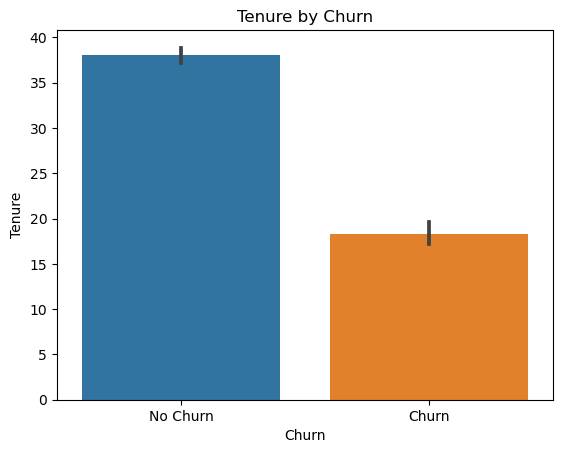

In [16]:
# creating bar plot for churn and tenure
sns.barplot(x='churn', y='tenure', data=train)
plt.title("Tenure by Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

- The longer a customer has been with a company the less likely they are to churn

#### I will now use a independent t test to investigate whether tenure and churn are associated.

- I will use a confidence interval of 95%
- The resulting alpha is .05
#### Ho: Tenure and churn are not associated.
#### Ha: Tenure and churn are associated.

In [17]:
# sets alpha value and runs independent ttest for monthly charges
a = 0.05
churned = train[train['has_churned'] == 1]['tenure']
not_churned = train[train['has_churned'] == 0]['tenure']

t_statistic, p_val = stats.ttest_ind(churned, not_churned)
p_val

4.577513863553669e-115

In [18]:
#code gives a true or false response to the mathematic equation below
p_val < a

True

#### The p-value is less than the alpha. Therefore, we have confidence that tenure and churn are asscoiated. Based on this, we can successfully reject the null hypothesis.

## Exploration Summary
"Tenure","monthly charges",and "total charges" were each found to be drivers of "churn"

- Revisisting data for more reasonable number features in future

* Gender was not found to be a driver of churn

## Features moving forward for modeling

- Tenure - (relationship to churn is statistically significant)

- Monthly Charges - (relationship to churn is statistically significant)

- Total Charges -  (relationship to churn is statistically significant)


## Features not moving forward for modeling

- Gender - (relationship to churn is statistically insignificant)

## Modeling

- I will use accuracy as my evaluation metric
- non-churn makes up approx. 73% of the data

- by guessing non-churn for every customer, one could achieve an accuracy of 73% 

- 73% will be the baseline accuracy I use for this project
- I will be evaluating models developed using three different model types and different hyperparameters 
- Models will be evaluated on train and validate data 
- The model that performs the best will then be evaluated on test data

In [19]:
# code sets up x train val and test as well as y train val and test. Code also drops certain columns and assigns to variable for easy use
columns_to_drop = ['customer_id','gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing','churn','has_churned',
       'contract_type', 'internet_service_type', 'payment_type',
       'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check','gender_female']

X_train = train.drop(columns=columns_to_drop)
y_train = train.has_churned

X_validate = validate.drop(columns=columns_to_drop)
y_validate = validate.has_churned

X_test = test.drop(columns=columns_to_drop)
y_test = test.has_churned

## KNN

In [20]:
#This runs the model for KNN
model_set = []
model_accuracy = []    
    
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
model_set.append(knn)
model_accuracy.append({
        'neighbors': 9,
        'train_score': round(knn.score(X_train, y_train), 2),
        'validate_score': round(knn.score(X_validate, y_validate), 2),
        'score_diff': round(knn.score(X_train, y_train) - knn.score(X_validate, y_validate), 2),
})

In [21]:
# creates data frame for model results
pd.DataFrame(model_accuracy)

,neighbors,train_score,validate_score,score_diff
0,9,0.82,0.78,0.03


```
Accuracy of KNN on train is 0.82
Accuracy of KNN on validate is 0.78
```
 
- KNN accuracy is better than baseline on train and validate

 
 


## Random Forest

In [22]:
#This runs the model for RF

model_set = []
model_accuracy = [] 
    
rf = RandomForestClassifier(max_depth=6)
rf.fit(X_train, y_train)
train_score = round(rf.score(X_train, y_train), 2)
validate_score = round(rf.score(X_validate, y_validate), 2)
score_difference = train_score - validate_score


model_set.append(rf)
model_accuracy.append({
        'max_depth': 6,
        'train_score': train_score,
        'validate_score': validate_score,
        'score_diff': score_difference,
})

In [23]:
# creates data frame for model results
pd.DataFrame(model_accuracy)

,max_depth,train_score,validate_score,score_diff
0,6,0.81,0.78,0.03


```
Accuracy of Random Forest on train is 0.81
Accuracy of Random Forest on validate is 0.78
```
 
- Random Forest accuracy is better than baseline on train and validate


## Logistic Regression

In [24]:
#This runs the model for Logistic Regression
model_set = []
model_accuracy = []


logit = LogisticRegression(C=1)
logit.fit(X_train, y_train)
train_score = round(logit.score(X_train, y_train), 2)
validate_score = round(logit.score(X_validate, y_validate), 2)
score_difference = train_score - validate_score



model_set.append(logit)
model_accuracy.append({
    'C': 1,
    'train_score': train_score,
    'validate_score': validate_score,
    'score_diff': score_difference,
})

In [25]:
# creates data frame for model results
pd.DataFrame(model_accuracy)

,C,train_score,validate_score,score_diff
0,1,0.79,0.78,0.01


```
Accuracy of Logistic Regression on train is 0.79
Accuracy of Logistic Regression on validate is 0.78
```
 
- Logistic Regression accuracy is better than baseline on train and validate

## Comparing Models

- KNN, Random Forest, and Logistic Regression models all performed about 6%-8% higher than baseline in both train and validate
- The KNN model performed slightly better on train data while all three models were equal in validation scoring.
- Because the results of KNN, Random Forest, and Logistic Regression models are all very close in accuracy, I could use any of them.
- I selected to proceed with KNN as my model due to its very slight accuracy advantage in training data at 0.82 which could potentially save about 40 customers from churning.

### KNN Test Score

In [26]:
#This runs the model for KNN
model_set = []
model_accuracy = []    
    
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
model_set.append(knn)
test_score = round(knn.score(X_test, y_test), 2)
model_accuracy.append({
        'neighbors': 9,
        'train_score': round(knn.score(X_train, y_train), 2),
        'validate_score': round(knn.score(X_validate, y_validate), 2),
        'score_diff': round(knn.score(X_train, y_train) - knn.score(X_validate, y_validate), 2),
        'Test_Score' : test_score
})

In [27]:
# creates data frame for model results
pd.DataFrame(model_accuracy)

,neighbors,train_score,validate_score,score_diff,Test_Score
0,9,0.82,0.78,0.03,0.78


Accuracy of KNN on test is 0.78

### Modeling Summary
- KNN, Random Forest, and Logistic Regression models all performed about 6%-8% higher than baseline in both train and validate
- The KNN model performed slightly better on train data while all three models were equal in validation scoring.
- Because the results of KNN, Random Forest, and Logistic Regression models are all very close in accuracy, I could use any of them.
- KNN was selected as final model and had a test score of 78%

## Conclusions

### Exploration

- Percentage of churn accounts for approximately 24% of the total customers.
- Whether the customer is a male or female does not affect whether the customer is more likely to churn.
- Customer with a higher monthly bill are more likely to churn.
- More of an obvious find was that customers with longer tenure are less likely to churn.
- Total charges had less of an impact on churn than monthly charges, nonetheless a impact was still found(although minimal).


## Modeling

#### The final model succeeded in outperforming the baseline accuracy by 5%. 



## Recommendations

#### To decrease the amount of customers churning in the future, it may be a good idea to analyze higher bills and a customers usage in order to see where the customer could save on their monthly charges

## Next Steps

- Further explore encoded columns in the cleaned data
- Look for more features that may need to be binned for further insight